# EDA for Twitter Sentiment Analysis

# Imports & Constants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [27]:
DATA_FILE_PATH = 'data/crowdflower-brands-and-product-emotions/data/'
DATA_FILE_NAME = 'judge_1377884607_tweet_product_company.csv'
SAVE_FILE = False
CLEAN_DATA_FILE_NAME = 'clean_twitter_data.csv'

# Read Data File

In [3]:
df = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME)

# Initial Review of Data

In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## What are the categorical values?

In [5]:
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [6]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Check for missing data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [8]:
print('Number of missing values per feature')
df.isna().sum()

Number of missing values per feature


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5552
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [9]:
print('Percentage of missing values per feature')
round(df.isna().sum() * 100 / len(df), 2)

Percentage of missing values per feature


tweet_text                                             0.01
emotion_in_tweet_is_directed_at                       63.66
is_there_an_emotion_directed_at_a_brand_or_product     0.00
dtype: float64

What are all the rows with missing data?

In [10]:
df_missing_target = df[df.emotion_in_tweet_is_directed_at.isna()]

In [11]:
df_missing_target

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
...,...,...,...
8715,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8719,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [12]:
df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5069
Positive emotion                       292
I can't tell                           142
Negative emotion                        49
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [13]:
df_missing_target.is_there_an_emotion_directed_at_a_brand_or_product.value_counts(normalize=True)

No emotion toward brand or product    0.913004
Positive emotion                      0.052594
I can't tell                          0.025576
Negative emotion                      0.008826
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

### summary

There is one row that doesn't have a tweet_text, but does have an associated emotion.  

~64% of the emotion_in_tweet_is_directed_at values are missing, 91% of which are for No emotion toward brand or product.

## Clean Data

* Delete the line with no tweet text
* Delete the lines where emotion = "I can't tell'
* Change are all mentions to @mention to anonymize the data
    * Some data will be lost because of this, but protecting the privacy of any individuals mentioned in the tweets is more important

In [14]:
df_clean = df.dropna(subset=['tweet_text'])

In [15]:
df_clean = df_clean[df_clean.is_there_an_emotion_directed_at_a_brand_or_product != "I can't tell"]

In [16]:
df_clean.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5155
Positive emotion                      2869
Negative emotion                       545
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [17]:
# change all mentions to @mention (some were already switched but not all)

df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub("@[A-Za-z0-9]+", "@mention", x))

## Save Cleaned Data File

In [18]:
if SAVE_FILE:
    df_clean.to_csv(DATA_FILE_PATH + CLEAN_DATA_FILE_NAME, index=False)

## Visualize Data

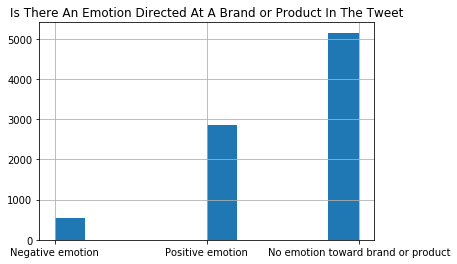

In [19]:
df_clean.is_there_an_emotion_directed_at_a_brand_or_product.hist()
plt.title('Is There An Emotion Directed At A Brand or Product In The Tweet')
plt.show()

The labels are highly imbalanced whether the data is taken as a binary classification problem with Positive vs. Negative emotions or taken as a multiclass classification problem with all three labels.

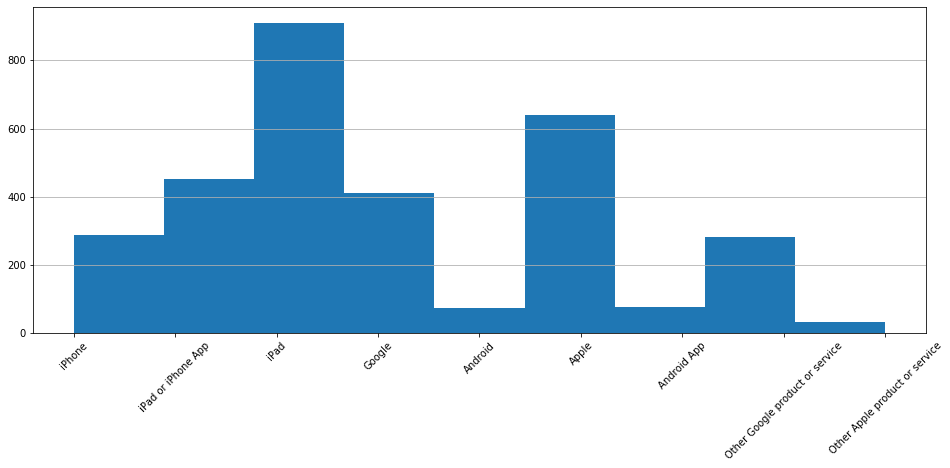

In [20]:
plt.figure(figsize=(16,6))
df.emotion_in_tweet_is_directed_at.hist(bins=9)
plt.xticks(rotation=45)
plt.grid(b=False, axis='x')
plt.show()

Looking at the brands/products the tweets are targeting, the great majority of them are directed at Apple or Apple products, and the minority are directed at Google.

How long are the tweets?

In [21]:
df_clean['tweet_len'] = df_clean.tweet_text.apply(len)

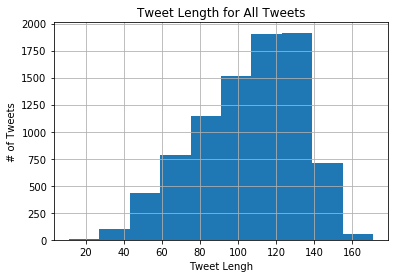

In [31]:
df_clean.tweet_len.hist()
plt.title('Tweet Length for All Tweets')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

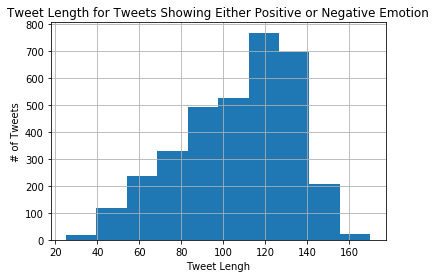

In [30]:
df_clean[df_clean.is_there_an_emotion_directed_at_a_brand_or_product != 'No emotion toward brand or product'].tweet_len.hist()
plt.title('Tweet Length for Tweets Showing Either Positive or Negative Emotion')
plt.xlabel('Tweet Lengh')
plt.ylabel('# of Tweets')
plt.show()

In [23]:
df_clean.tweet_len.max()

171

In [24]:
pd.set_option('display.max_colwidth', None)

In [25]:
df_clean[df_clean.tweet_len > 140]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_len
24,Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW,Android App,Positive emotion,144
25,"RT @mention: I'm looking forward to the #SMCDallas pre #SXSW party Wed., and hoping I'll win an #iPad resulting from my shameless promotion. #ChevySMC",iPad,Positive emotion,151
36,The best! RT @mention Ha! First in line for #ipad2 at #sxsw &quot;pop-up&quot; Apple store was an event planner #eventprofs #pcma #engage365,iPad,Positive emotion,141
40,@mention - Great weather to greet you for #sxsw! Still need a sweater at night..Apple putting up &quot;flash store&quot; downtown to sell iPad2,Apple,Positive emotion,144
49,Khoi Vinh (@mention says Conde Nast's headlong rush into iPad publishing was a &quot;fundamental misunderstanding&quot; of the platform #sxsw,NaN,No emotion toward brand or product,141
...,...,...,...,...
8580,"Preso l'express pass per The City Dark e Road to Nowhere, visto il primo iPad 2 &quot;in the wild&quot; e ora panel con il cast di Source Code #SXSW",NaN,No emotion toward brand or product,148
8612,"In case my fairy god mother = reading mail; my �ـ�G wish this week is 2 go 2 #sxsw �ύ for the #Android ��� Dev ��� Meetup. @mention Hilton, Sat. 12:30PM",NaN,No emotion toward brand or product,152
8689,"@mention you might also appreciate new iPhone app tweetcaster. Zip it feature let's you hide ANY keywords or hashtag, incl of course #sxsw :)",iPad or iPhone App,Positive emotion,141
8696,"&quot;If you were able to afford to attend #sxsw or buy an #iPad today, consider saving a few $$$ for #Japan #earthquake relief. #Justsayin&quot; #FF",NaN,No emotion toward brand or product,150


In [26]:
df_clean[df_clean.tweet_len == 171]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_len
5521,"RT @mention From a poster he saw RT @mention &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW.",NaN,No emotion toward brand or product,171


Although tweets were restricted to 140 characters at the time the data was collected, 530 of the instances are longer than that with a max of 171.  It looks like this is due to quotes being replaced with '&quot;' added 6 characters each and some mentions have been changed to @mention and that may have affected tweet length in some cases.  All the tweets seem valid in any case.

There doesn't look at be much difference in the distribution of the tweet lengths between those that show emotion vs. the ones that are neutral.